In my another example, I use tensorflow to do classification problem. Besides, we can also tensorflow to do quantite prediction problem.

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

print("x shape:",x_data.shape)
print("y shape:",y_data.shape)
# the shape is very important for tensorflow input

x shape: (200, 1)
y shape: (200, 1)


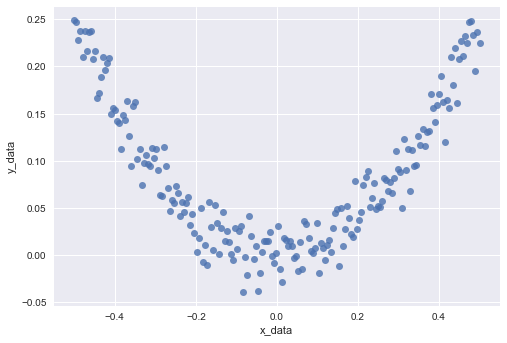

In [13]:
# draw the data we generate
df = DataFrame({"x_data":x_data.reshape([200]),
               "y_data":y_data.reshape([200])})
sns.regplot(x="x_data", y="y_data", data=df,fit_reg=False)
plt.show()

Here we use two hidden layers with the first hidden having 80 nodes and the second one having 40 nodes.

For each layer, I use sigmoid activation function.

In [16]:
## set he 
learning_rate = 0.01
training_period = 1000
display_step = 1

# Network Parameters
n_hidden_1 = 80 # 1st layer number of features
n_hidden_2 = 40 # 2nd layer number of features
n_input = 1
n_classes = 1

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# define variable
w1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
w2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
w3 = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))

b1 = tf.Variable(tf.random_normal([n_hidden_1]))
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
b3 = tf.Variable(tf.random_normal([n_classes]))

layer_1 = tf.add(tf.matmul(x, w1), b1)
layer_1 = tf.nn.sigmoid(layer_1)
# Hidden layer with RELU activation
layer_2 = tf.add(tf.matmul(layer_1, w2), b2)
layer_2 = tf.nn.sigmoid(layer_2)
# Output layer with linear activation
prediction = tf.add(tf.matmul(layer_2, w3), b3)
    
# Define loss and optimizer
loss = tf.reduce_mean(tf.square(y-prediction))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [22]:
# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for k in range(training_period):
        sess.run(optimizer, feed_dict={x:x_data, y:y_data})
    pred_y = sess.run(prediction,feed_dict={x:x_data})

In [25]:
# see the predicted y
print("predicted y:", pred_y[:20])

predicted y: [[ 0.25426501]
 [ 0.24903959]
 [ 0.24385995]
 [ 0.23872787]
 [ 0.233643  ]
 [ 0.22860593]
 [ 0.22361869]
 [ 0.21868008]
 [ 0.2137906 ]
 [ 0.20895225]
 [ 0.20416409]
 [ 0.19942707]
 [ 0.19474143]
 [ 0.19010693]
 [ 0.18552572]
 [ 0.18099636]
 [ 0.17652005]
 [ 0.17209691]
 [ 0.16772789]
 [ 0.1634112 ]]


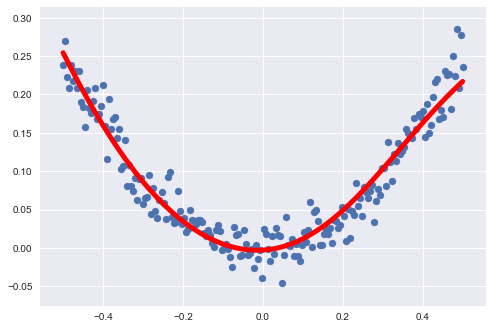

In [26]:
# now we draw the predicted y
plt.figure()
plt.scatter(x_data,y_data)
plt.plot(x_data,pred_y,'r-',lw=5)
plt.show()